Extract features from EmoDB dataset

In [1]:
import librosa
import os
import numpy as np
import pandas as pd

# Import metadatas

In [2]:
sr = 16000

In [3]:
ravdess = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/ravdess/processed_metadata.csv")
emovo = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emovo/processed_metadata.csv")
emodb = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emodb/processed_metadata.csv")

# ravdess = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/ravdess/processed_metadata.csv")
# emovo = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emovo/processed_metadata.csv")
# emodb = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emodb/processed_metadata.csv")

In [4]:
emodb

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537
...,...,...,...,...,...,...
530,/datasets/nicolas_facchinetti/emodb/data/15a04...,15a04Wa.wav,angry,15,m,1.945397
531,/datasets/nicolas_facchinetti/emodb/data/11b03...,11b03Td.wav,sad,11,m,5.905034
532,/datasets/nicolas_facchinetti/emodb/data/12b02...,12b02Na.wav,neutral,12,m,2.982086
533,/datasets/nicolas_facchinetti/emodb/data/14b01...,14b01Eb.wav,disgust,14,f,3.291791


In [5]:
ravdess

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-05-01-02-01-15.wav,angry,Actor_15,m,3.703719
1,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-15.wav,surprised,Actor_15,m,3.370068
2,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-07-02-02-02-15.wav,disgust,Actor_15,m,3.470159
3,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-02-01-15.wav,sad,Actor_15,m,3.303356
4,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-03-01-02-01-15.wav,happy,Actor_15,m,3.336689
...,...,...,...,...,...,...
1435,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-06-02-01-02-13.wav,fear,Actor_13,m,3.269977
1436,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136463
1437,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536871
1438,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036417


In [6]:
emovo

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,happy,m3,m,5.205351
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-b3.wav,happy,m3,m,1.877370
2,/datasets/nicolas_facchinetti/emovo/data/m3/pa...,pau-m3-n5.wav,fear,m3,m,4.394694
3,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-b2.wav,sad,m3,m,2.773333
4,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-l4.wav,sad,m3,m,3.370703
...,...,...,...,...,...,...
583,/datasets/nicolas_facchinetti/emovo/data/m2/di...,dis-m2-b3.wav,disgust,m2,m,2.474694
584,/datasets/nicolas_facchinetti/emovo/data/m2/so...,sor-m2-d1.wav,surprised,m2,m,2.090703
585,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,fear,m2,m,1.962676
586,/datasets/nicolas_facchinetti/emovo/data/m2/tr...,tri-m2-n2.wav,sad,m2,m,2.368027


In [7]:
frames = {'emodb': emodb, 'emovo': emovo, 'ravdess': ravdess}

result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537
...,...,...,...,...,...,...
1435,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-06-02-01-02-13.wav,fear,Actor_13,m,3.269977
1436,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136463
1437,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536871
1438,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036417


# Example fetures extraction

In [8]:
example_audio = emovo.path[10]
samples, sample_rate = librosa.load(example_audio, sr=sr)

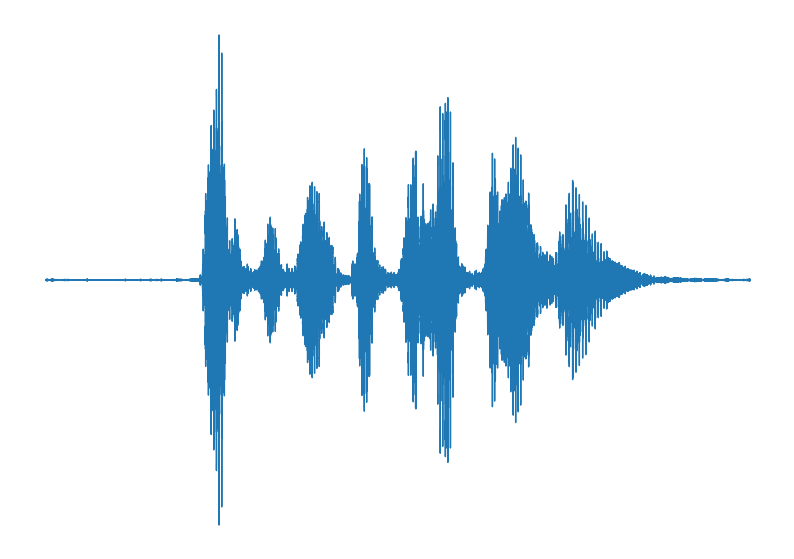

In [9]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(samples, sr=sample_rate)

In [10]:
import IPython
IPython.display.Audio(samples, rate=sr)

/tmp/ipykernel_827161/767138357.py:2: FutureWarning: Pass y=[-0.000285   -0.0004134  -0.00041567 ... -0.0002805  -0.00039708
 -0.00048429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)


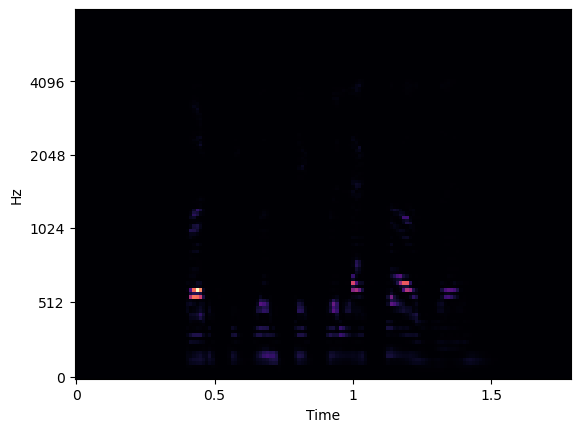

In [11]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)
librosa.display.specshow(mel_scale_sgram, sr=sample_rate, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

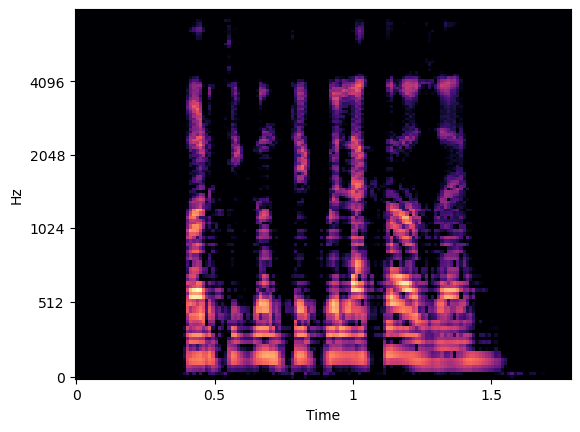

In [12]:
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sample_rate, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

Try to trim start and end silence

/tmp/ipykernel_827161/288648120.py:2: FutureWarning: Pass y=[ 9.7299169e-04  9.2726300e-04  8.6007925e-04 ...  5.1229045e-04
  2.9479788e-05 -5.4760720e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_trimmed = librosa.feature.melspectrogram(trimmed, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)


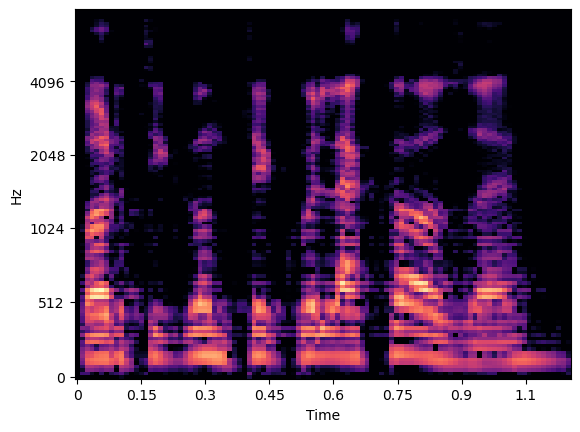

In [98]:
trimmed = librosa.effects.trim(samples, top_db=30, frame_length=512, hop_length=64)[0]
mel_trimmed = librosa.feature.melspectrogram(trimmed, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)
log_mel_trimmed = librosa.amplitude_to_db(mel_trimmed, ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')
IPython.display.Audio(trimmed, rate=sr)

# Length analysis

Original length of all the samples

count    2563.000000
mean        3.375437
std         0.924356
min         1.225533
25%         2.885215
50%         3.536871
75%         3.837188
max        13.994694
Name: length, dtype: float64

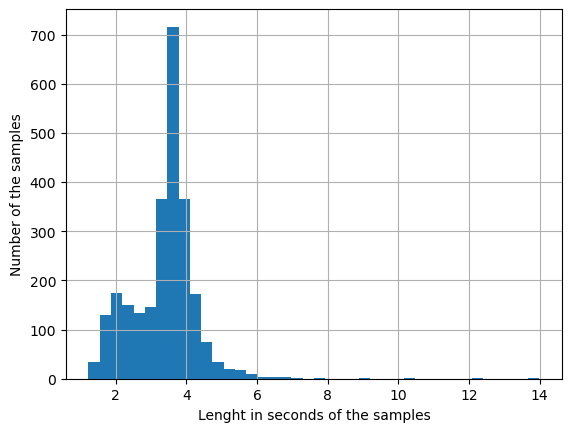

In [14]:
result["length"].hist(bins=40)
plt.xlabel("Lenght in seconds of the samples")
plt.ylabel("Number of the samples")

stock_l = result["length"].describe()
stock_l

# Load and trim the samples for each dataset

In [15]:
def load_samples(metadata):
    samples = []
    for _, data in metadata.iterrows():
        # load audio data
        path = data["path"]
        sample, _ = librosa.load(path, sr=sr)
        trimmed = librosa.effects.trim(sample, top_db=30, frame_length=512, hop_length=64)[0]
        samples.append(trimmed)
    return samples

In [16]:
dataset_samples = {}
for dataset in frames:
    print(f'Processing {dataset}')
    dataset_samples[dataset] = load_samples(frames[dataset])

Processing emodb
Processing emovo
Processing ravdess


In [17]:
len(dataset_samples['emodb']), len(frames['emodb']), len(dataset_samples['emovo']), len(frames['emovo']), len(dataset_samples['ravdess']), len(frames['ravdess'])

(535, 535, 588, 588, 1440, 1440)

Update metadata with new lengths

In [18]:
for d in dataset_samples:
    trimmed_length = [len(s)/sr for s in dataset_samples[d]]
    frames[d]['trimmed_lenght'] = trimmed_length

In [19]:
result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length,trimmed_lenght
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383,4.451375
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710,2.180000
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821,2.500000
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517,3.132000
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537,2.268000
...,...,...,...,...,...,...,...
1435,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-06-02-01-02-13.wav,fear,Actor_13,m,3.269977,1.348000
1436,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136463,1.260000
1437,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536871,1.608000
1438,/datasets/nicolas_facchinetti/ravdess/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036417,1.096000


Trimmed length analysis

,length,trimmed_lenght
count,2563.000000,2563.00000
mean,3.375437,2.13118
std,0.924356,0.91958
min,1.225533,0.90000
25%,2.885215,1.56400
50%,3.536871,1.85200
75%,3.837188,2.40800
max,13.994694,13.94800


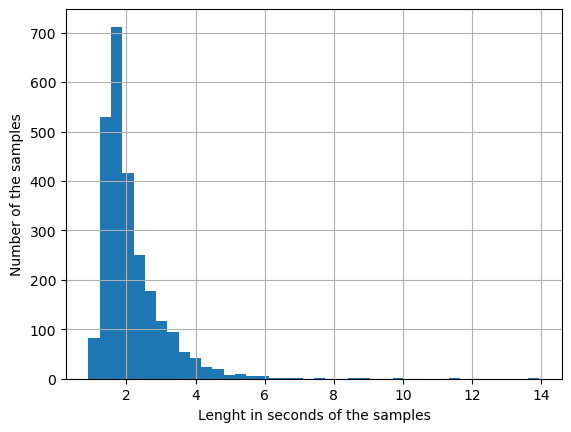

In [20]:
result["trimmed_lenght"].hist(bins=40)
plt.xlabel("Lenght in seconds of the samples")
plt.ylabel("Number of the samples")

trim_l = result["trimmed_lenght"].describe()
pd.concat([stock_l, trim_l], axis=1)

In [21]:
min_l = result["trimmed_lenght"].describe()["min"]
min_s = result.loc[result['trimmed_lenght'] == min_l]
min_s

,path,filename,label,actor,gender,length,trimmed_lenght
451,/datasets/nicolas_facchinetti/emovo/data/m1/pa...,pau-m1-d2.wav,fear,m1,m,1.92,0.9


In [22]:
short_sample = dataset_samples['emovo'][451]
IPython.display.Audio(short_sample, rate=sr)

In [23]:
min_sample = librosa.load(min_s.path[451], sr=sr)[0]
IPython.display.Audio(min_sample, rate=sr)

/tmp/ipykernel_827161/37082602.py:1: FutureWarning: Pass y=[-1.1006718e-03 -1.0997665e-03 -1.2131915e-03 ... -1.6036804e-03
 -3.8770116e-03  5.8755690e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_trimmed = librosa.feature.melspectrogram(short_sample, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)


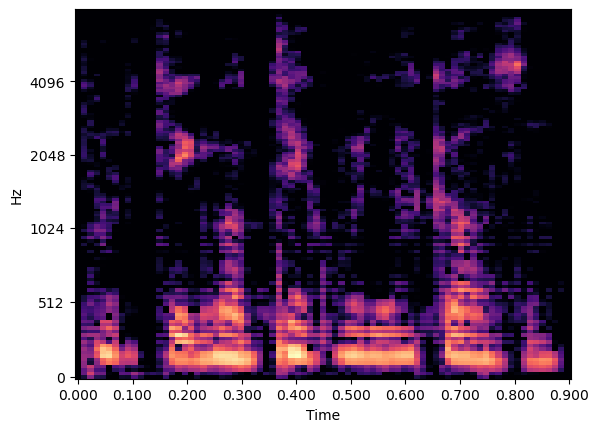

In [24]:
mel_trimmed = librosa.feature.melspectrogram(short_sample, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)
log_mel_trimmed = librosa.amplitude_to_db(mel_trimmed, ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

# Split and repeat

Let's keep a sample length equal to 3 seconds, repeat the shorter while split the longer segments. Throw away samples below min lenght

In [25]:
target_l = 3
buffer_length = target_l*sr
target_l, buffer_length

(3, 48000)

In [26]:
import math 
def repeat_sample(data, length):
    n = math.ceil(length/len(data))
    data = np.tile(data, n)
    return data[:int(length)]

In [27]:
repeated = repeat_sample(short_sample, buffer_length)
len(repeated)/sr

3.0

/tmp/ipykernel_827161/3933984038.py:1: FutureWarning: Pass y=[-0.00110067 -0.00109977 -0.00121319 ...  0.14599895  0.12819809
  0.13458316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(repeated, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


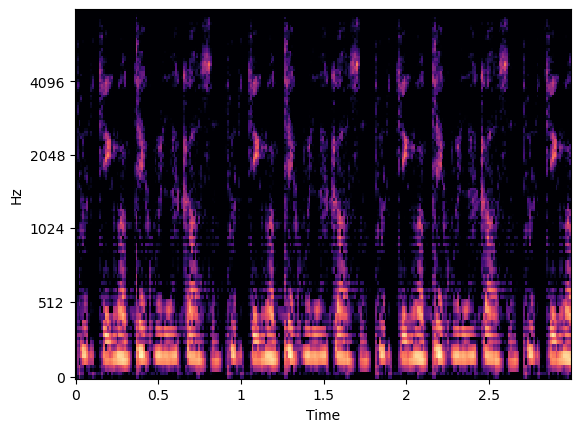

In [28]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(repeated, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

In [29]:
IPython.display.Audio(repeated, rate=sr)

In [30]:
max_l = result["trimmed_lenght"].describe()["max"]
max_s = result.loc[result['trimmed_lenght'] == max_l, "path"]
max_s

423    /datasets/nicolas_facchinetti/emovo/data/m1/tr...
Name: path, dtype: object

In [31]:
long_sample = dataset_samples['emovo'][423]
long_sample, len(long_sample)/sr

(array([-1.8111437e-04, -6.4358261e-04,  1.5116505e-05, ...,
         1.0038956e-04, -6.0805539e-04,  3.1681026e-05], dtype=float32),
 13.948)

/tmp/ipykernel_827161/3539990406.py:1: FutureWarning: Pass y=[-1.8111437e-04 -6.4358261e-04  1.5116505e-05 ...  1.0038956e-04
 -6.0805539e-04  3.1681026e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(long_sample, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


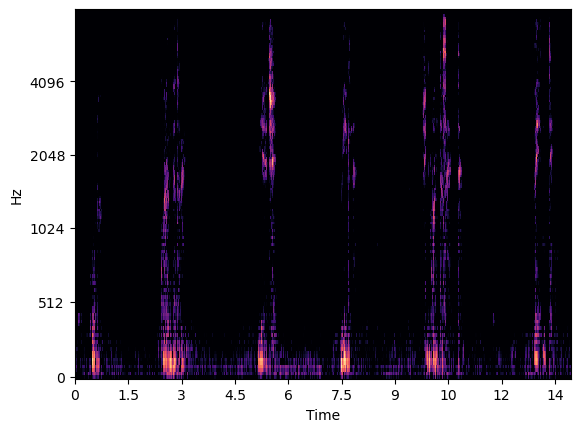

In [32]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(long_sample, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

In [33]:
IPython.display.Audio(long_sample, rate=sr)

In [34]:
def split_sample(audio, length, minimum):
    samples_total = len(audio)
    samples_wrote = 0
    segments = []
    
    to_process = samples_total - samples_wrote
    while to_process > minimum:
        segment = audio[samples_wrote : (samples_wrote + length)]
        segments.append(segment)
        samples_wrote += length
        to_process = samples_total - samples_wrote
    return segments

In [71]:
splitted = split_sample(long_sample, int(buffer_length), int(min_l))
[len(s)/sr for s in splitted]

[3.0, 3.0, 3.0, 3.0, 1.948]

In [72]:
IPython.display.Audio(splitted[1], rate=sr)

Example of splitted and repeated sample

In [126]:
splitted = split_sample(dataset_samples['emodb'][0], int(buffer_length), int(min_l))
[len(s)/sr for s in splitted]

[3.0, 1.451375]

In [127]:
splitted = [librosa.effects.trim(s, top_db=30, frame_length=512, hop_length=64)[0] for s in splitted]
[len(s)/sr for s in splitted]

[3.0, 1.451375]

In [128]:
s = splitted[1]
s = repeat_sample(s, buffer_length)
librosa.get_duration(s, sr=sr), librosa.get_duration(splitted[1], sr=sr)

/tmp/ipykernel_827161/1362115016.py:3: FutureWarning: Pass y=[ 0.04537964  0.04653931  0.04031372 ... -0.00811768 -0.0085144
 -0.01239014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.get_duration(s, sr=sr), librosa.get_duration(splitted[1], sr=sr)
/tmp/ipykernel_827161/1362115016.py:3: FutureWarning: Pass y=[ 0.04537964  0.04653931  0.04031372 ... -0.00036621 -0.00036621
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.get_duration(s, sr=sr), librosa.get_duration(splitted[1], sr=sr)


(3.0, 1.451375)

/tmp/ipykernel_827161/4048441257.py:1: FutureWarning: Pass y=[-0.03799438 -0.04031372 -0.03955078 ... -0.00036621 -0.00036621
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(dataset_samples['emodb'][0], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


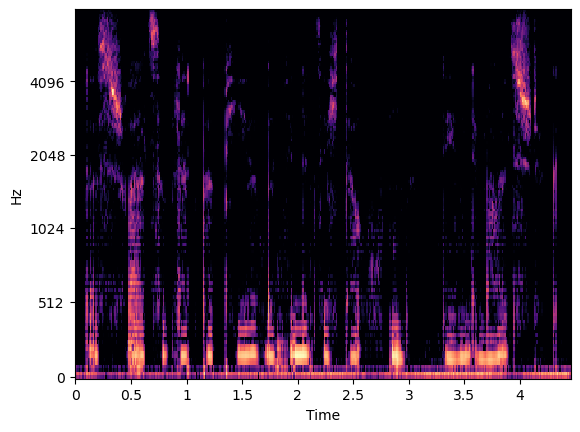

In [129]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(dataset_samples['emodb'][0], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

/tmp/ipykernel_827161/2795824903.py:1: FutureWarning: Pass y=[-0.03799438 -0.04031372 -0.03955078 ...  0.04962158  0.04653931
  0.04653931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[0], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


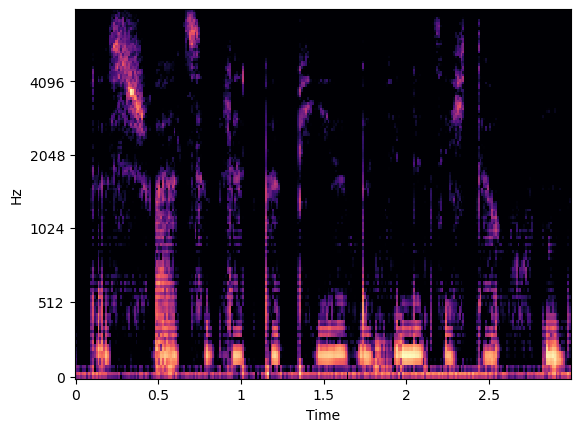

In [130]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[0], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

/tmp/ipykernel_827161/3409018382.py:1: FutureWarning: Pass y=[ 0.04537964  0.04653931  0.04031372 ... -0.00036621 -0.00036621
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[1], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


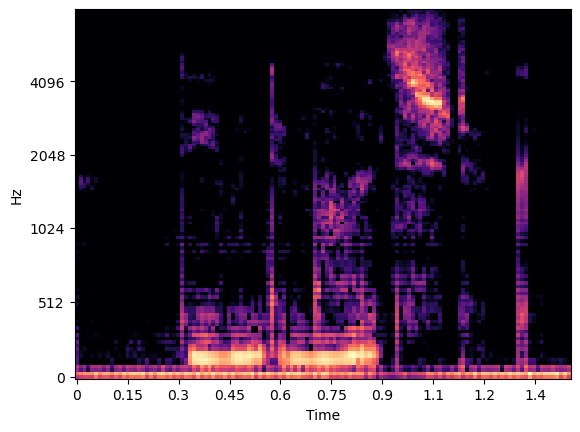

In [131]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[1], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

/tmp/ipykernel_827161/922374256.py:1: FutureWarning: Pass y=[ 0.04537964  0.04653931  0.04031372 ... -0.00811768 -0.0085144
 -0.01239014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(s, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


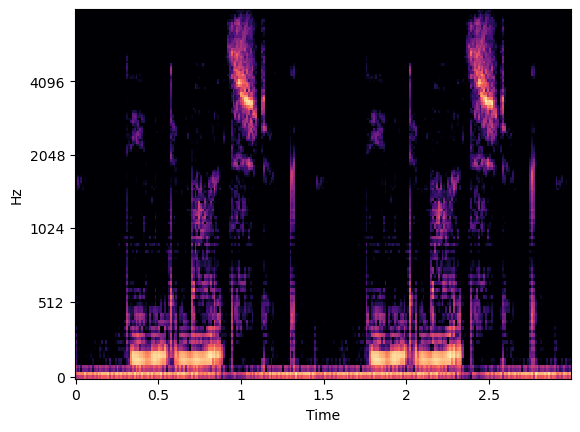

In [132]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(s, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

In [133]:
IPython.display.Audio(s, rate=sr)

In [39]:
log_mel_trimmed.shape

(128, 261)

# Dataset processing

Split and repeat all the samples to the same length, then extract log Mel-specotrograms from all the samples

In [64]:
result.head()

,path,filename,label,actor,gender,length,trimmed_lenght
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,sad,13,f,4.451383,4.451375
1,/datasets/nicolas_facchinetti/emodb/data/14b09...,14b09Ac.wav,fear,14,f,2.287710,2.180000
2,/datasets/nicolas_facchinetti/emodb/data/11b02...,11b02Na.wav,neutral,11,m,2.698821,2.500000
3,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Fd.wav,happy,9,f,3.312517,3.132000
4,/datasets/nicolas_facchinetti/emodb/data/16b10...,16b10Fb.wav,happy,16,f,2.583537,2.268000


In [65]:
from tqdm.notebook import tqdm

def process_audio_files(audio_data, metadata):
    sgram_list = []
    audio_list = []
    mod_data = []
    for idx, data in tqdm(metadata.iterrows(), total=metadata.shape[0]):
        # load audio data
        sample = audio_data[idx]
        
        
        splitted_list = []
        # split the larger segmtents
        if len(sample) >= buffer_length:
            splitted = split_sample(sample, int(buffer_length), int(min_l))
            # trim silent parts in each splitted frame
            samples = [(librosa.effects.trim(splitted_sample, top_db=30, frame_length=512, hop_length=64)[0], num)
                       for num, splitted_sample in enumerate(splitted)]
            splitted_list += samples
        else:
            splitted_list.append((sample, 0))
           
        # repeat the shorter segments
        for sample in splitted_list:
            s = sample[0]
            if len(s) < buffer_length:
                s = repeat_sample(s, buffer_length)
            
            # compute log mel-spectrograms
            mel_scale_sgram = librosa.feature.melspectrogram(y=s, sr=sr, n_fft=368, hop_length=184, n_mels=128)
            log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
            
            # save computation
            audio_list.append(s)
            sgram_list.append(log_mel_sgram)
            mod_data.append([data["path"], data["filename"], sample[1], data["label"], data["actor"], data["gender"]])

    df_info_mod = pd.DataFrame(mod_data, columns=['path', 'filename', 'chunk', 'label', 'actor', 'gender'])
    return sgram_list, audio_list, df_info_mod

In [66]:
frames['emovo']

,path,filename,label,actor,gender,length,trimmed_lenght
0,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-l1.wav,happy,m3,m,5.205351,3.888
1,/datasets/nicolas_facchinetti/emovo/data/m3/gi...,gio-m3-b3.wav,happy,m3,m,1.877370,1.392
2,/datasets/nicolas_facchinetti/emovo/data/m3/pa...,pau-m3-n5.wav,fear,m3,m,4.394694,3.440
3,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-b2.wav,sad,m3,m,2.773333,1.888
4,/datasets/nicolas_facchinetti/emovo/data/m3/tr...,tri-m3-l4.wav,sad,m3,m,3.370703,2.164
...,...,...,...,...,...,...,...
583,/datasets/nicolas_facchinetti/emovo/data/m2/di...,dis-m2-b3.wav,disgust,m2,m,2.474694,2.408
584,/datasets/nicolas_facchinetti/emovo/data/m2/so...,sor-m2-d1.wav,surprised,m2,m,2.090703,1.392
585,/datasets/nicolas_facchinetti/emovo/data/m2/pa...,pau-m2-b3.wav,fear,m2,m,1.962676,1.252
586,/datasets/nicolas_facchinetti/emovo/data/m2/tr...,tri-m2-n2.wav,sad,m2,m,2.368027,2.124


In [67]:
process_audio_files(dataset_samples['emovo'], frames['emovo'].iloc[[0]]) 

  0%|          | 0/1 [00:00<?, ?it/s]

([array([[24.332962, 24.332962, 24.332962, ..., 24.332962, 24.404778,
          29.285362],
         [24.332962, 29.137001, 29.510788, ..., 38.979202, 40.130077,
          45.010662],
         [24.332962, 39.3718  , 55.62881 , ..., 24.332962, 24.332962,
          34.27858 ],
         ...,
         [24.332962, 24.332962, 24.332962, ..., 24.332962, 24.332962,
          24.332962],
         [24.332962, 24.332962, 24.332962, ..., 24.332962, 24.332962,
          24.332962],
         [24.332962, 24.332962, 24.332962, ..., 24.332962, 24.332962,
          24.332962]], dtype=float32),
  array([[46.338696, 19.886238, 19.886238, ..., 19.886238, 19.886238,
          30.789154],
         [62.063995, 19.886238, 29.042953, ..., 30.748566, 33.63804 ,
          46.514458],
         [53.448013, 19.886238, 20.901428, ..., 31.454163, 35.04194 ,
          33.565155],
         ...,
         [19.886238, 19.886238, 19.886238, ..., 19.886238, 19.886238,
          19.886238],
         [19.886238, 19.886238, 19.

In [69]:
elaborated_data = {}
for dataset in frames:
    sgram, audio, df = process_audio_files(dataset_samples[dataset], frames[dataset])
    print(f"Done {dataset}")
    elaborated_data[dataset] = {"sgram": sgram, 'audio':audio, "df":df}

  0%|          | 0/535 [00:00<?, ?it/s]

Done emodb


  0%|          | 0/588 [00:00<?, ?it/s]

Done emovo


  0%|          | 0/1440 [00:00<?, ?it/s]

Done ravdess


# Save data

Save data for future computations

In [71]:
for dataset in frames:
    sgram = elaborated_data[dataset]["sgram"]
    df = elaborated_data[dataset]["df"]
    
    np.save(f'/datasets/nicolas_facchinetti/processed_data/{dataset}/sgram_pre_aug.npy', sgram)
    df.to_csv(f"/datasets/nicolas_facchinetti/processed_data/{dataset}/metadata_pre_aug.csv", index=False)
    
    # np.save(f'D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{dataset}/sgram_pre_aug.npy', sgram)
    # df.to_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//{dataset}/metadata_pre_aug.csv", index=False)